In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
emotions1=["Happy","Sad","Amused","Tender","Angry","Scared","Disgusted","Neutral"]

In [4]:
emotions=["Happy","Sad","Amused","Tender","Angry","Scared","Disgusted"]


In [5]:
for emotion in emotions:
        print(emotion)
        d = {name: pd.DataFrame() for name in emotions}
        path2=f"U:\\Semester 7\\Capstone\\Emotions\\Extracted {emotion}\\"
        #print(path2)
        for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
            for filename in files:
#                 print(filename)
                df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True)
#                 print(np.array(df2).shape)
                d[emotion] = pd.concat([d[emotion], df2])
            print(np.array(d[emotion]).shape)
    

Happy
(1763, 39)
Sad
(1991, 39)
Amused
(2022, 39)
Tender
(1662, 39)
Angry
(2448, 39)
Scared
(884, 39)
Disgusted
(1674, 39)


In [6]:
for emotion in emotions:
        print(emotion)
        d = {name: pd.DataFrame() for name in emotions}
        path2=f"U:\\Semester 7\\Capstone\\Emotions\\Extracted {emotion}\\"
        #print(path2)
        for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
            for filename in files:
#                 print(filename)
                df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True, header=0, index_col=0)
#                 print(np.array(df2).shape)
                d[emotion] = pd.concat([d[emotion], df2])
            
        export_file_path = "U:\\Semester 7\\Capstone\\Emotions\\Finalcsvs\\"
        csvfilename=f"{emotion}.csv"
        print(export_file_path+csvfilename)
        newpath=export_file_path+csvfilename
        print(np.array(d[emotion]).shape)
        d[emotion]=d[emotion].iloc[:,:-1].dropna()
        print(np.array(d[emotion]).shape)
        d[emotion].to_csv(newpath, index = None, header=True)
#         print(d[emotion].head(80))

Happy
U:\Semester 7\Capstone\Emotions\Finalcsvs\Happy.csv
(1763, 38)
(1174, 37)
Sad
U:\Semester 7\Capstone\Emotions\Finalcsvs\Sad.csv
(1991, 38)
(1338, 37)
Amused
U:\Semester 7\Capstone\Emotions\Finalcsvs\Amused.csv
(2022, 38)
(1398, 37)
Tender
U:\Semester 7\Capstone\Emotions\Finalcsvs\Tender.csv
(1662, 38)
(1115, 37)
Angry
U:\Semester 7\Capstone\Emotions\Finalcsvs\Angry.csv
(2448, 38)
(1556, 37)
Scared
U:\Semester 7\Capstone\Emotions\Finalcsvs\Scared.csv
(884, 38)
(519, 37)
Disgusted
U:\Semester 7\Capstone\Emotions\Finalcsvs\Disgusted.csv
(1674, 38)
(1007, 37)


In [7]:

data = pd.DataFrame() 
path2=f"U:\\Semester 7\\Capstone\\Emotions\\Finalcsvs\\"
#print(path2)
for root, dirs, files in os.walk(path2):
#             df1 = pd.Dataframe
    for filename in files:
        
        #print(filename)
        df2=pd.read_csv(path2+filename,sep=',', skip_blank_lines=True, header=0, index_col=0)
        df2["Emotion"]=filename[:-4]
        #print(df2.head())
#                 print(np.array(df2).shape)
        data = pd.concat([data, df2])

export_file_path = "U:\\Semester 7\\Capstone\\Emotions\\"

csvfilename="Allfeatures.csv"
# print(export_file_path+csvfilename)
newpath=export_file_path+csvfilename
# print(np.array(d[emotion]).shape)
# d[emotion]=d[emotion].iloc[:,:-1].dropna()
# print(np.array(d[emotion]).shape)
data = data.drop("Battery", axis=1)
data = data.drop("HeadBandOn", axis=1)
data = data.drop("Gyro_X", axis=1)
data = data.drop("Gyro_Y", axis=1)
data = data.drop("Gyro_Z", axis=1)
data = data.drop("HSI_TP9", axis=1)
data = data.drop("HSI_TP10", axis=1)
data = data.drop("HSI_AF7", axis=1)
data = data.drop("HSI_AF8", axis=1)
data = data.drop("AUX_RIGHT", axis=1)
data = data.drop("Accelerometer_X", axis=1)
data = data.drop("Accelerometer_Z", axis=1)
data = data.drop("Accelerometer_Y", axis=1)
data=data.sample(frac=1)
print(data.head(25))

data.to_csv(newpath, index = None, header=True)
# #         print(d[emotion].head(80))

           Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  Theta_AF8  \
Delta_TP9                                                                      
 0.540034   0.803615  -0.263441    0.168931   0.159531   0.356520  -0.295784   
 0.149771   0.253535   0.578154    0.606145   0.009796   0.212852  -0.064238   
-0.066366  -0.453483  -0.069380    0.105457  -0.193809  -0.402539   0.003401   
 0.218026   0.000000   0.467383    0.888921   0.095387   0.000000   0.089932   
 0.971143   0.613813   0.366377    0.991649   0.733046  -0.047291   0.050081   
 0.676671   0.680080   0.656523    0.803457   0.182391  -0.124810   0.418654   
 0.213173   0.000000   0.292700    0.282793   0.711423   0.000000   0.444640   
 0.323069   0.215630   0.675818    0.699674   0.151315  -0.718794   0.402615   
 0.963676  -0.584777   0.221903    0.302150   0.558278  -0.763722   0.182198   
 1.318964   0.022107   0.446671    1.532767   1.606674   0.176633   0.029063   
-3.198223   0.585866   0.147618    1.055

In [8]:
Y = data.iloc[:,-1]
Y

Delta_TP9
 0.540034          Sad
 0.149771    Disgusted
-0.066366        Happy
 0.218026          Sad
 0.971143       Amused
 0.676671      Neutral
 0.213173       Tender
 0.323069       Amused
 0.963676      Neutral
 1.318964      Neutral
-3.198223      Neutral
 0.365441        Happy
 0.918767      Neutral
 0.411681          Sad
 1.432752       Tender
 0.718750      Neutral
 0.487070      Neutral
 0.056968       Tender
 0.357012        Angry
 0.487026       Tender
 0.663098          Sad
 0.526629      Neutral
 0.531769       Tender
 0.225120      Neutral
 0.481116       Tender
 0.230538      Neutral
 0.389395        Happy
-3.568150      Neutral
 0.081728        Angry
 0.111698      Neutral
               ...    
 0.878025          Sad
 0.921296        Happy
 0.877619        Angry
-0.404254        Angry
 0.048582       Scared
 1.050515      Neutral
 0.818705          Sad
 0.733242      Neutral
-3.568150      Neutral
 0.543511        Angry
 0.578504        Happy
 1.140964      Neutral
 

In [9]:
X = data.iloc[:,:-1]
# X = X.fillna(X.mean())
# # np.where(np.isnan(X))
normalized_X = preprocessing.normalize(X)
X

,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,...,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10
Delta_TP9,,,,,,,,,,,,,,,,,,,,,
0.540034,0.803615,-0.263441,0.168931,0.159531,0.356520,-0.295784,0.210762,0.718441,0.107953,0.286740,...,0.581179,0.902186,0.655396,0.249737,0.410515,0.371228,863.47986,866.30035,806.66670,865.09155
0.149771,0.253535,0.578154,0.606145,0.009796,0.212852,-0.064238,0.429435,0.221751,-0.130791,0.468704,...,0.875127,0.597081,0.255251,-0.554928,0.434432,0.476996,807.87550,747.83880,780.47620,790.14655
-0.066366,-0.453483,-0.069380,0.105457,-0.193809,-0.402539,0.003401,0.145561,0.822553,0.098947,0.281481,...,0.609252,0.486049,0.224205,0.857623,0.603281,0.177965,823.18680,788.93774,781.28204,821.57510
0.218026,0.000000,0.467383,0.888921,0.095387,0.000000,0.089932,0.844171,0.311854,0.000000,0.322353,...,0.872978,0.800579,-0.262106,0.000000,0.355486,0.454008,804.24910,1130.21970,1031.50180,793.36993
0.971143,0.613813,0.366377,0.991649,0.733046,-0.047291,0.050081,0.794498,1.200492,0.185769,0.173454,...,0.771983,0.819066,0.448506,0.063187,0.458826,1.002911,819.56040,784.10254,802.63740,786.11720
0.676671,0.680080,0.656523,0.803457,0.182391,-0.124810,0.418654,0.252183,0.710622,-0.028109,0.414571,...,-0.006982,0.514306,0.241685,-0.361572,-0.172194,0.374023,812.71063,915.86080,761.53845,832.85710
0.213173,0.000000,0.292700,0.282793,0.711423,0.000000,0.444640,0.677217,0.842879,0.000000,0.387306,...,0.191733,0.528343,0.739228,0.000000,-0.169691,0.269688,763.15020,862.67400,890.07324,800.62270
0.323069,0.215630,0.675818,0.699674,0.151315,-0.718794,0.402615,0.740568,0.592953,0.073890,0.507593,...,0.062287,0.973163,0.803525,0.263728,-0.076880,0.821955,796.99634,780.47620,794.98170,796.99634
0.963676,-0.584777,0.221903,0.302150,0.558278,-0.763722,0.182198,0.437109,0.668945,-0.325872,0.270021,...,0.148604,0.274723,0.789660,-0.151043,-0.383720,0.133214,831.24540,809.89014,801.02563,799.81683


[ 0.04346345  0.04078229  0.04488434  0.04307175  0.03723157  0.03720672
  0.03961191  0.04609336  0.04357345  0.03796767  0.04108007  0.05241387
  0.0553812   0.05056608  0.0485088   0.05936214  0.05269056  0.04946337
  0.06024203  0.02854403  0.03280145  0.02960317  0.02545671]


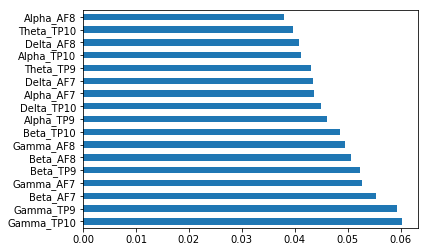

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [11]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.3)
model_5 = SVC(kernel='linear')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.296360485269


In [12]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.4)
model_5 = SVC(kernel='linear')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.29116117851


In [13]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.5)
model_5 = SVC(kernel='linear')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.295667244367


In [14]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.3)
model_5 = SVC(kernel='linear')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.304159445407


In [15]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.3)
model_5 = SVC(kernel='rbf')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.304159445407


In [16]:

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.3)
model_5 = SVC(kernel='rbf')
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
# print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))
# print("ROC-AUC Curve:", roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

Accuracy: 0.301848642403


In [17]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.29547141796585, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2955811362792425, total=   2.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.29580081753994797, total=   2.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.29547141796585, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.2955811362792425, total=   1.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.29580081753994797, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.29547141796585, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.2955811362792425, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.29580081753994797, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=linear .....

[CV]  C=1, gamma=0.0001, kernel=linear, score=0.2955811362792425, total=   1.9s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.29580081753994797, total=   2.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.2951002227171492, total=   3.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.2955811362792425, total=   3.6s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.29580081753994797, total=   3.5s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.29547141796585, total=   2.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.2955811362792425, total=   1.8s
[CV] C=10, gamma=1, kernel=linear .........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.29547141796585, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.2955811362792425, total=   2.6s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.29580081753994797, total=   2.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.29547141796585, total=   3.9s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.2955811362792425, total=   3.9s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV]  C=100, gamma=0.0001, kernel=linear, score=0.29580081753994797, total=   4.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.29398663697104677, total=  25.9s
[CV] C=1000, gamm

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 21.4min finished


{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
